In [9]:
import numpy as np
from scipy.optimize import curve_fit
from astropy.table import Table, hstack
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import tqdm.notebook as tqdm
import pickle
import os
import paths

In [2]:
data_path = paths.data / "Var_notVar_data"
with open(data_path/ "Xsigma_Nevents_data.pkl", 'rb') as fp:
        data = pickle.load(fp)

percent_cut = data['percent_cut']
control_holding_g = data['control_holding_g']
control_holding_r = data['control_holding_r']
Varstar_holding_g = data['Varstar_holding_g']
Varstar_holding_r = data['Varstar_holding_r']
pos_steps = data['pos_steps']
percent_line_g = data['percent_line_g']
percent_line_r = data['percent_line_r']

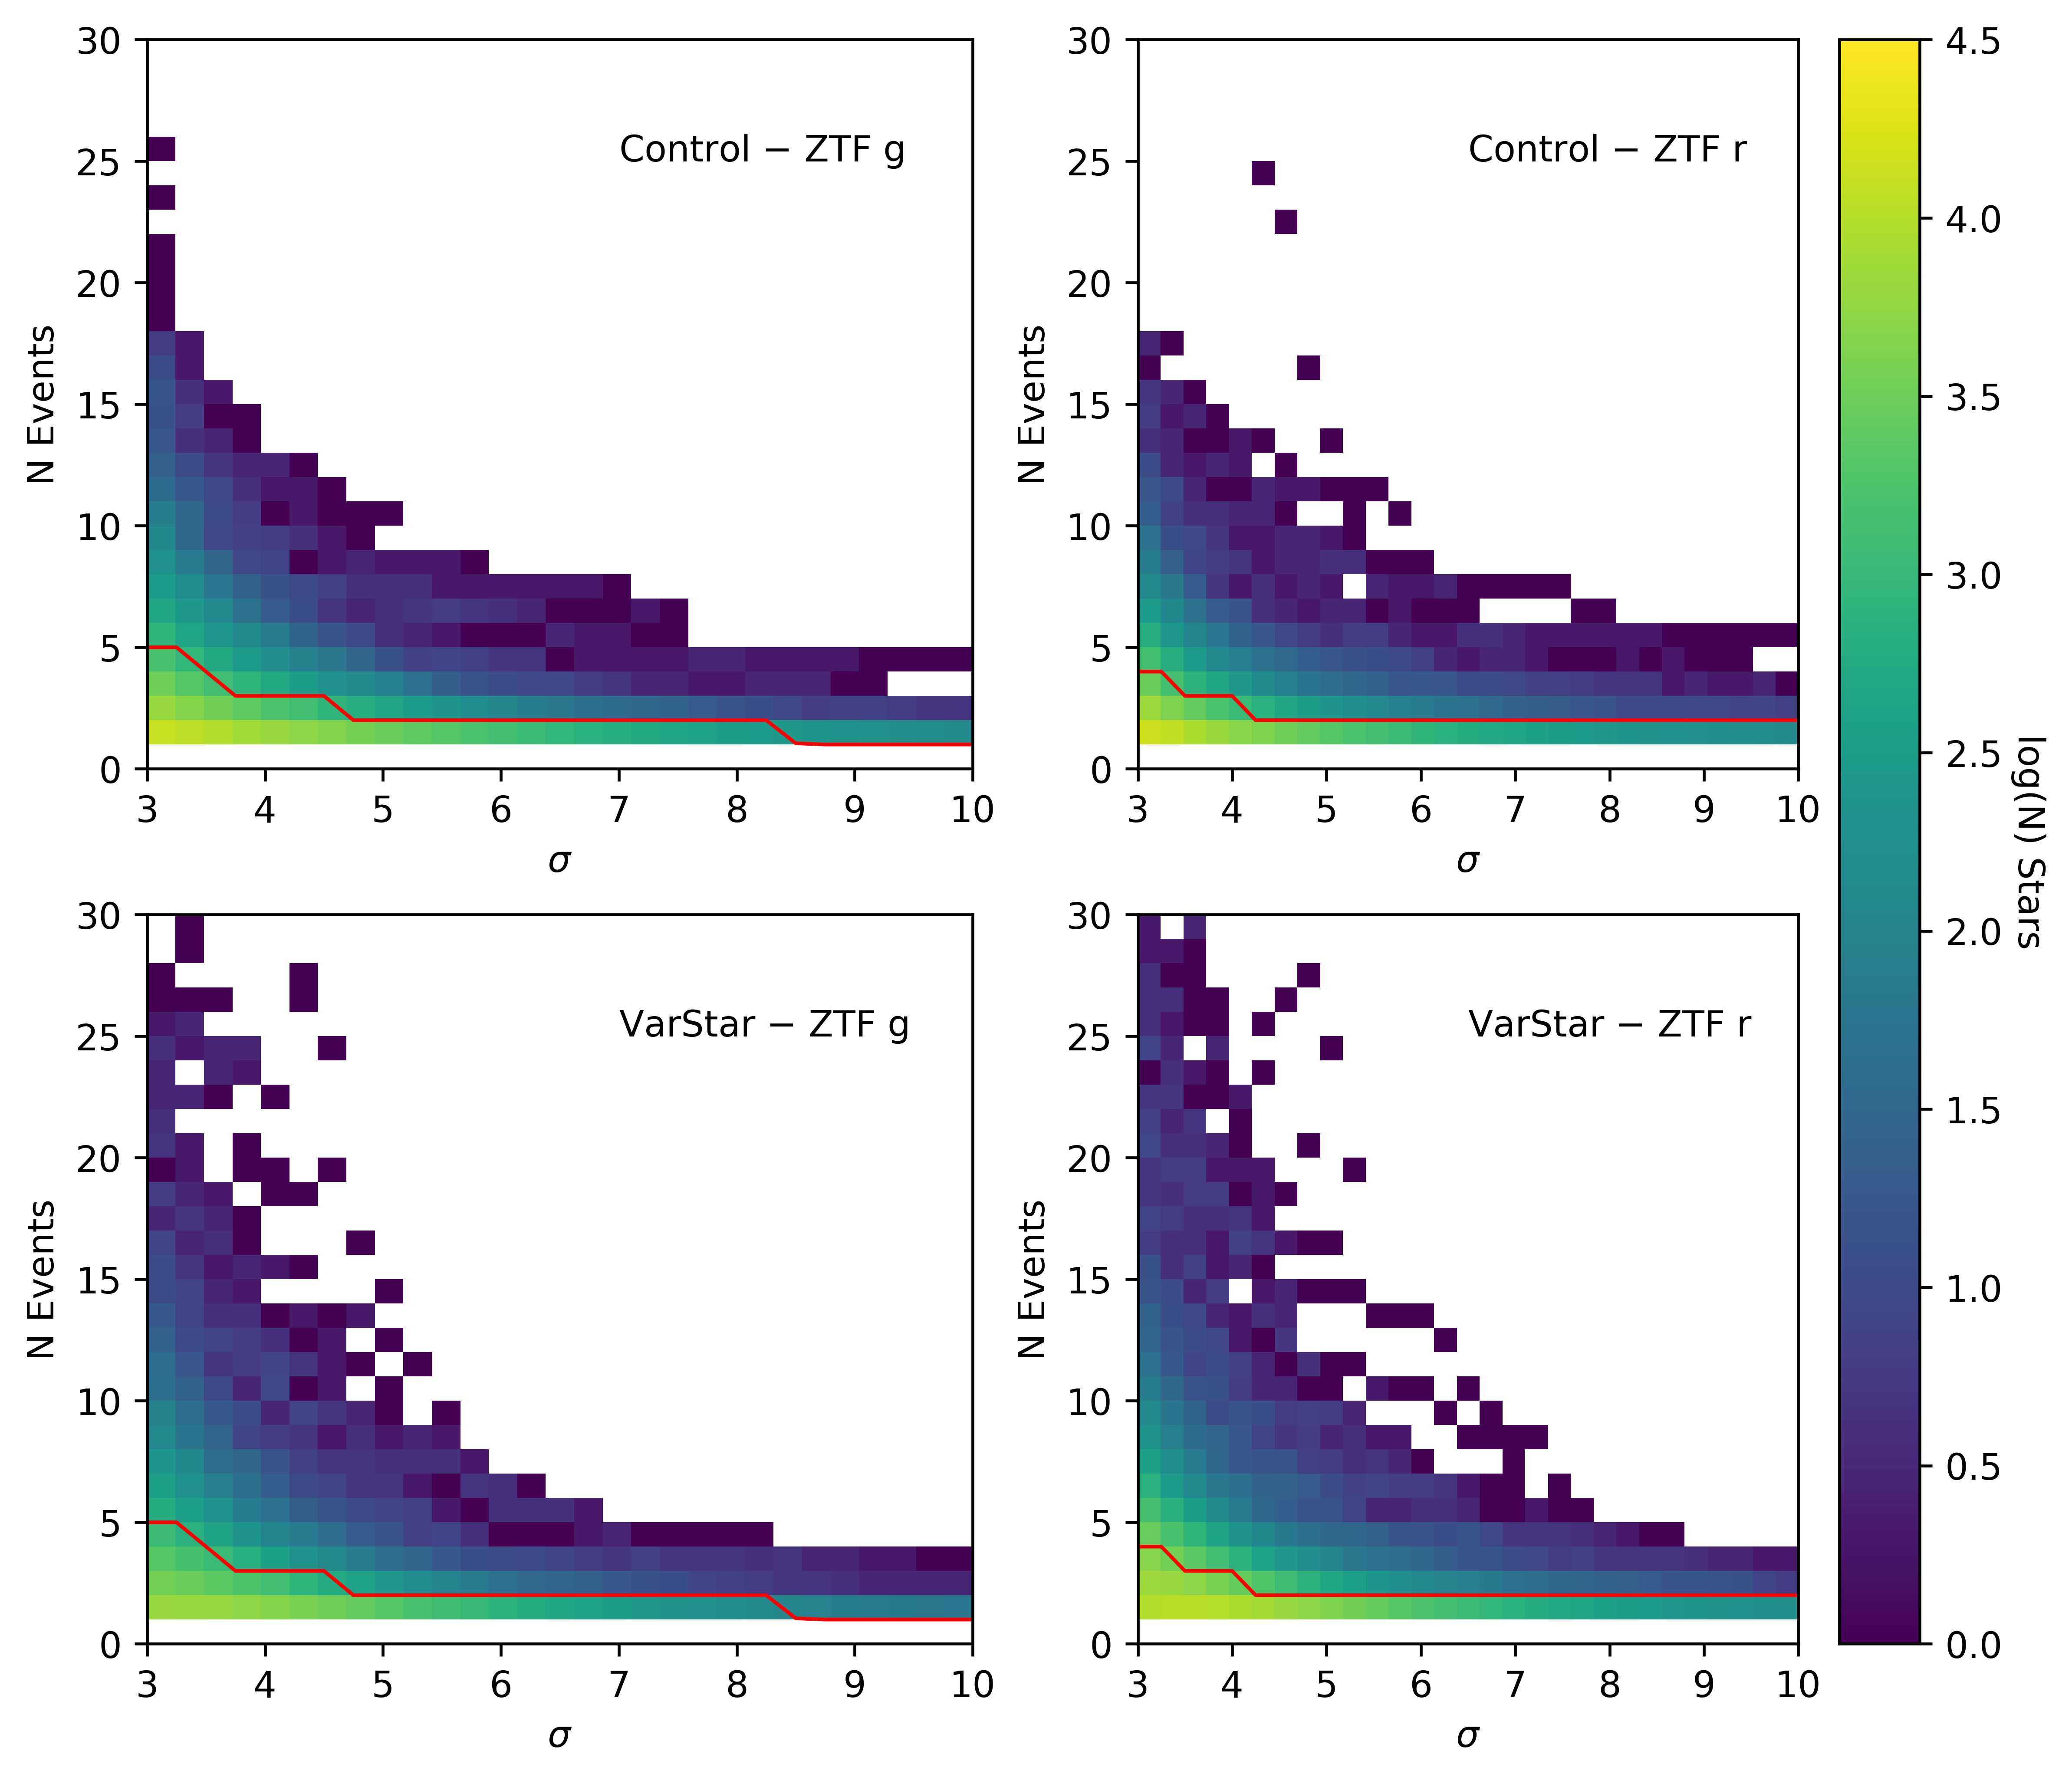

In [13]:
xmin = 3
xmax = 10

ymin = 0
ymax = 30 #76
########################################################
fig = plt.figure(figsize=(9, 8), constrained_layout=False, dpi=600)

gs0 = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs0[0, 0])
ax2 = fig.add_subplot(gs0[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs0[1, 0], sharex=ax1)
ax4 = fig.add_subplot(gs0[1, 1], sharey=ax3, sharex=ax2)

# plt.setp(ax1.get_xticklabels(), visible=False)
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax2.get_yticklabels(), visible=False)
# plt.setp(ax4.get_yticklabels(), visible=False)
# plt.setp(ax3.get_xticklabels(), visible=False)

# gs0.update(hspace=0.0, wspace=0.0) # set the spacing between axes. 

########################################################
im1 = ax1.imshow(np.log10(control_holding_g), origin='lower', aspect='auto', extent=(3, 10, 0, 76), vmin=0.0, vmax=4.5)

ax1.plot(pos_steps, percent_line_g, c='r', lw=1)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

ax1.set_xlabel('$\sigma$')
ax1.set_ylabel('N Events')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
# ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax1.text(7, 25, r"Control $-$ ZTF g")

im3 = ax3.imshow(np.log10(Varstar_holding_g), origin='lower', aspect='auto', extent=(3, 10, 0, 76), vmin=0.0, vmax=4.5)

ax3.plot(pos_steps, percent_line_g, c='r', lw=1)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)

ax3.set_xlabel('$\sigma$')
ax3.set_ylabel('N Events')

ax3.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
# ax3.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax3.text(7, 25, r"VarStar $-$ ZTF g")

im2 = ax2.imshow(np.log10(control_holding_r), origin='lower', aspect='auto', extent=(3, 10, 0, 76), vmin=0.0, vmax=4.5)

ax2.plot(pos_steps, percent_line_r, c='r', lw=1)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)

ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('N Events')

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
# ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax2.text(6.5, 25, r"Control $-$ ZTF r")


im4 = ax4.imshow(np.log10(Varstar_holding_r), origin='lower', aspect='auto', extent=(3, 10, 0, 76), vmin=0.0, vmax=4.5)

ax4.plot(pos_steps, percent_line_r, c='r', lw=1)

ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)

ax4.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
# ax4.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax4.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax4.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax4.set_xlabel('$\sigma$')
ax4.set_ylabel('N Events')
# ax4.set_title('Varstar Sample r')

ax4.text(6.5, 25, r"VarStar $-$ ZTF r")


cbar = fig.colorbar(im4, ax=[ax2, ax4])
cbar.ax.set_ylabel('log(N) Stars', rotation=270, labelpad=12)
########################################################
plt.savefig(paths.figures / "VarStar_Nevents_vs_Xsigma.pdf", dpi=600, bbox_inches='tight', facecolor='white')